<a href="https://www.kaggle.com/victortrigo/cnn-para-diagnostico-de-neumon-a?scriptVersionId=84916986" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
import tensorflow as tf
from tensorflow.keras import models, optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2
import os

# import warnings
# warnings.filterwarnings("ignore")

## Extract Data

In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [4]:
print('train data: ', train.shape)
print('test data: ', test.shape)
print('val data: ', val.shape)

train data:  (5216, 2)
test data:  (624, 2)
val data:  (16, 2)


In [5]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

## Transform Data

In [6]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [7]:
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(x_val.shape[0], img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1)
y_test = np.array(y_test)

In [8]:
print('train data image: ', x_train.shape)
print('test data image: ', x_test.shape)
print('val data image: ', x_val.shape)

train data image:  (5216, 150, 150, 1)
test data image:  (624, 150, 150, 1)
val data image:  (16, 150, 150, 1)


## Data Viz

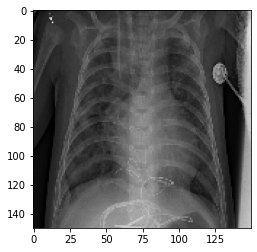

In [9]:
plt.imshow(x_train[0], cmap='gray')

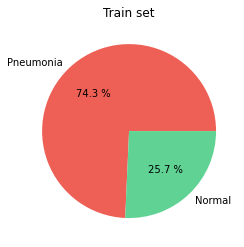

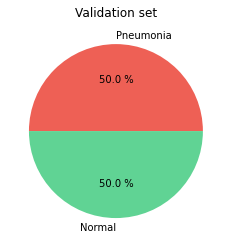

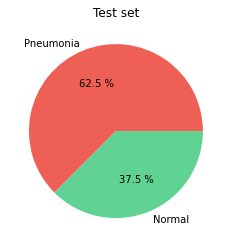

In [10]:
plt.pie(pd.Series(y_train).value_counts(),
       labels=('Pneumonia','Normal'), autopct="%0.1f %%", colors = ["#EE6055","#60D394"])
plt.title('Train set')
plt.show()


plt.pie(pd.Series(y_val).value_counts(),
       labels=('Pneumonia','Normal'), autopct="%0.1f %%", colors = ["#EE6055","#60D394"])
plt.title('Validation set')
plt.show()


plt.pie(pd.Series(y_test).value_counts(),
       labels=('Pneumonia','Normal'), autopct="%0.1f %%", colors = ["#EE6055","#60D394"])
plt.title('Test set')
plt.show()


## Model

In [11]:
base_filtros = 16
w_regularizers = 1e-4

In [12]:
model = Sequential()

## conv 1
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 2
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## conv 3
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## conv 4
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## conv 5
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 6
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

## Clasificacion - Flatten
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

2022-01-10 20:46:27.196613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 20:46:27.360822: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 20:46:27.361540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 20:46:27.362692: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      160       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 16)      2320      
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0

In [13]:
datagen = ImageDataGenerator(rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  horizontal_flip=True,
                  vertical_flip=True
)

In [14]:
checkpoint = ModelCheckpoint('mejor_modelo.hdf5', 
                             verbose=1, 
                             save_best_only=True, 
                             monitor='val_accuracy'
)

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy']
)

In [16]:
y_train = tf.keras.utils.to_categorical(
    y_train, num_classes=2, dtype='float32'
)

y_val = tf.keras.utils.to_categorical(
    y_val, num_classes=2, dtype='float32'
)

In [17]:
hist = model.fit(datagen.flow(x_train, y_train),
                 callbacks=[checkpoint],
                 steps_per_epoch=x_train.shape[0]//128,
                 epochs=100,
                 verbose=2,
                 validation_data=(x_val, y_val)
)

2022-01-10 20:46:30.415600: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-01-10 20:46:32.175439: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


40/40 - 10s - loss: 1.1953 - accuracy: 0.8070 - val_loss: 1.1935 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to mejor_modelo.hdf5
Epoch 2/100
40/40 - 2s - loss: 0.7494 - accuracy: 0.8773 - val_loss: 2.0328 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/100
40/40 - 2s - loss: 0.6993 - accuracy: 0.9008 - val_loss: 2.6629 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/100
40/40 - 2s - loss: 0.5372 - accuracy: 0.8914 - val_loss: 8.4769 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/100
40/40 - 2s - loss: 0.6019 - accuracy: 0.9078 - val_loss: 8.2099 - val_accuracy: 0.5000

Epoch 00005: val_accuracy did not improve from 0.50000
Epoch 6/100
40/40 - 2s - loss: 1.2257 - accuracy: 0.8594 - val_loss: 20.8389 - val_accuracy: 0.5000

Epoch 00006: val_accuracy did not improve from 0.50000
Epoch 7/100
40/40 - 2s - loss: 0.7282 - accu

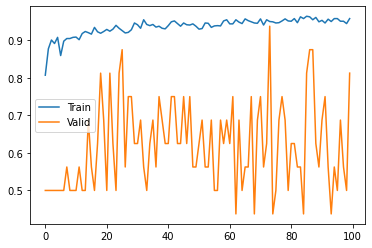

In [18]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()